### Step 0.1: Import Required Libraries

Before we can do anything, we import Python libraries for working with files and data.


In [1]:
import pandas as pd
import os
import zipfile


### Step 0.2: Extract the Fitbit Data ZIP File

We extract the data from the `.zip` file into a new folder so we can load the individual CSV files.


In [2]:
zip_path = "/content/mturkfitbit_export_3.12.16-4.11.16.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("bellabeat_data")


In [3]:
os.listdir("bellabeat_data")


['Fitabase Data 3.12.16-4.11.16']

In [4]:
os.listdir("bellabeat_data/Fitabase Data 3.12.16-4.11.16")


['minuteStepsNarrow_merged.csv',
 'hourlyIntensities_merged.csv',
 'hourlyCalories_merged.csv',
 'dailyActivity_merged.csv',
 'minuteIntensitiesNarrow_merged.csv',
 'weightLogInfo_merged.csv',
 'minuteCaloriesNarrow_merged.csv',
 'minuteMETsNarrow_merged.csv',
 'minuteSleep_merged.csv',
 'hourlySteps_merged.csv',
 'heartrate_seconds_merged.csv']

## Step 1: Load and Explore the Daily Activity Data

We start our analysis by loading the `dailyActivity_merged.csv` file, which contains information about users' steps, calories burned, distance traveled, and minutes spent in different activity levels.


Before doing any cleaning or analysis, we need to:
- Confirm the file loads successfully
- Understand the structure and contents
- Visually scan the first few rows to spot potential issues

This is a basic but essential first step in any data workflow.


In [5]:
# Define path to file
file_path = "bellabeat_data/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv"

# Load CSV into a DataFrame called df
df = pd.read_csv(file_path)

# Display first 5 rows
df.head()


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


## Step 2: Understand the Structure and Types of the Data

We found **457 rows** and **15 columns** in the dataset.

Each row represents one user's daily activity summary, and the columns include metrics such as steps, distances, activity minutes, and calories. The only non-numeric column is `ActivityDate`, which is currently stored as text (`object` type).

All columns have **complete data (no null values)**, which reduces the need for missing value handling.

This confirms the dataset is well-structured and clean. The small size means it’s suitable for identifying general trends but not for deep subgroup analysis. The `ActivityDate` column will need to be converted to datetime format for time-based analysis in the next step.


In [6]:
# Check general structure and data types
df.info()

# Check dataset dimensions (rows, columns)
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

(457, 15)

In [7]:
# Convert the 'ActivityDate' column to datetime format
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

# Create a new column that stores the weekday name
df['Weekday'] = df['ActivityDate'].dt.day_name()

# Display the first 5 rows to confirm changes
df[['ActivityDate', 'Weekday']].head()


,ActivityDate,Weekday
0,2016-03-25,Friday
1,2016-03-26,Saturday
2,2016-03-27,Sunday
3,2016-03-28,Monday
4,2016-03-29,Tuesday


## Step 4: Identify the Number of Unique Users

We found **35 unique users** in the dataset.

This tells us how many individuals are represented. A higher number increases the diversity of behaviors captured. A lower number might mean results reflect personal routines rather than general trends.

With 35 users, the dataset has a **moderate sample size**. It's large enough to identify broad usage patterns, but too small for detailed subgroup analysis (e.g., by age or fitness level). We’ll treat any findings as **directional insights**, not statistically definitive conclusions.


In [8]:
# Count the number of unique users in the dataset
df['Id'].nunique()


35

## Step 5: Summary Statistics of User Activity

We generated descriptive statistics for all numerical columns using `.describe()`.

### Key Findings:
- The average daily step count is **6,546**, but 25% of days fall below **2,000 steps**, indicating frequent inactivity.
- Most users log **0 minutes of very active time** on a typical day. Only the top 25% of days include over **25 minutes** of intense movement.
- **Sedentary time averages 995 minutes per day**, with some days showing the full **1,440 minutes** (24 hours). This suggests either non-usage or the device being worn during prolonged inactivity.
- Daily calories burned vary widely, from **0 to 4,562**, showing the dataset includes both inactive and highly active users.

### Interpretation:
This confirms a wide range of engagement and activity among users. It supports segmenting the population by activity level in future steps and highlights a potential marketing opportunity: encouraging inactive users to move more.

We'll use these insights to build user segments and look for trends in behavior over time.


In [9]:
# Generate summary statistics for all numeric columns
df.describe()


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,4.570000e+02,457,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,4.628595e+09,2016-04-04 04:40:26.258205696,6546.562363,4.663523,4.609847,0.179427,1.180897,0.478643,2.890197,0.001904,16.623632,13.070022,170.070022,995.282276,2189.452954
min,1.503960e+09,2016-03-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,2.347168e+09,2016-04-02 00:00:00,1988.000000,1.410000,1.280000,0.000000,0.000000,0.000000,0.870000,0.000000,0.000000,0.000000,64.000000,728.000000,1776.000000
50%,4.057193e+09,2016-04-05 00:00:00,5986.000000,4.090000,4.090000,0.000000,0.000000,0.020000,2.930000,0.000000,0.000000,1.000000,181.000000,1057.000000,2062.000000
75%,6.391747e+09,2016-04-08 00:00:00,10198.000000,7.160000,7.110000,0.000000,1.310000,0.670000,4.460000,0.000000,25.000000,16.000000,257.000000,1285.000000,2667.000000
max,8.877689e+09,2016-04-12 00:00:00,28497.000000,27.530001,27.530001,6.727057,21.920000,6.400000,12.510000,0.100000,202.000000,660.000000,720.000000,1440.000000,4562.000000
std,2.293781e+09,NaN,5398.493064,4.082072,4.068540,0.849232,2.487159,0.830995,2.237523,0.008487,28.919704,36.208635,122.205372,337.021404,815.484523


## Step 6: Visualize Daily Step Count Distribution

We plotted a histogram to understand how daily step counts are distributed across all users and days.

### Key Findings:
- There is a significant spike at **0 steps**, representing more than 80 days. This likely reflects days when users either did not wear the device or it failed to sync.
- A large portion of the dataset (approx. 25%) logs **fewer than 2,000 steps**, reinforcing the earlier summary statistics.
- Only a small number of days exceed **10,000 steps**, which is commonly considered a benchmark for an active day.
- The overall distribution is **right-skewed**, indicating that most users have relatively low step counts, with a few high-activity outliers.

### Interpretation:
This distribution suggests that many users are either inactive, inconsistent in device use, or need motivation to be more active. Bellabeat may want to focus on behavior-change strategies for lower-activity users and highlight progress tracking features in its marketing.


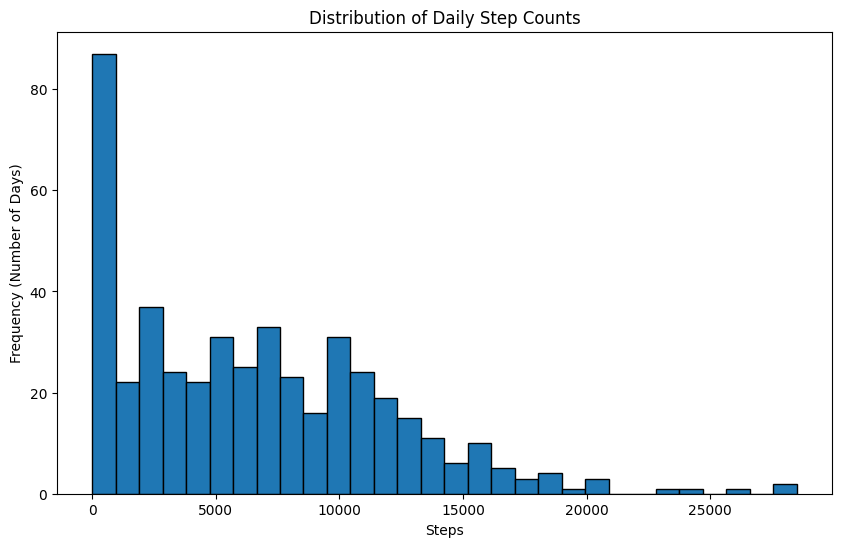

In [10]:
import matplotlib.pyplot as plt

# Set the figure size for readability
plt.figure(figsize=(10,6))

# Plot histogram of daily step counts
plt.hist(df['TotalSteps'], bins=30, edgecolor='black')

# Add title and axis labels
plt.title("Distribution of Daily Step Counts")
plt.xlabel("Steps")
plt.ylabel("Frequency (Number of Days)")

# Show the plot
plt.show()


## Step 7: Identify and Flag Inactive Days

We found **61 out of 457 records** with `TotalSteps == 0`, representing approximately **13.3%** of the data.

This likely reflects days when:
- The device was not worn
- Syncing failed
- Or the user was completely inactive (less likely)

### Action Taken:
We created a new column, `ActivityStatus`, to flag each record as either **"Active"** or **"Inactive"** based on step count.

This allows us to:
- Exclude inactive records when calculating meaningful averages
- Track device engagement patterns
- Avoid misinterpreting zeroes as real behavior

Inactive records will be used selectively in analysis, depending on the question being answered.


In [11]:
# Count how many days have zero steps
(df['TotalSteps'] == 0).sum()


np.int64(61)

In [12]:
# Create a new column that flags inactive vs active days
df['ActivityStatus'] = df['TotalSteps'].apply(lambda x: 'Inactive' if x == 0 else 'Active')

# Preview the new column
df[['TotalSteps', 'ActivityStatus']].head()


,TotalSteps,ActivityStatus
0,11004,Active
1,17609,Active
2,12736,Active
3,13231,Active
4,12041,Active


## Step 8: Analyze Average Daily Steps by Weekday

We calculated the average number of steps taken for each day of the week and visualized the result in a bar chart.

### Key Findings:
- **Wednesday** has the highest average daily step count.
- **Tuesday** has the lowest average, with users walking significantly less on this day compared to others.
- Weekends (Saturday and Sunday) show similar or slightly higher activity levels than weekdays, but not dramatically so.

### Interpretation:
This suggests that user behavior peaks mid-week, possibly due to routine-driven movement (e.g., commuting or workouts). The drop on Tuesday could indicate recovery from Monday or lower overall motivation.

### Implications:
Bellabeat could:
- Target **Tuesday** with motivational push notifications or challenges
- Promote **mid-week fitness campaigns** aligned with natural behavior peaks
- Encourage consistency throughout the week with habit-stacking or streak features


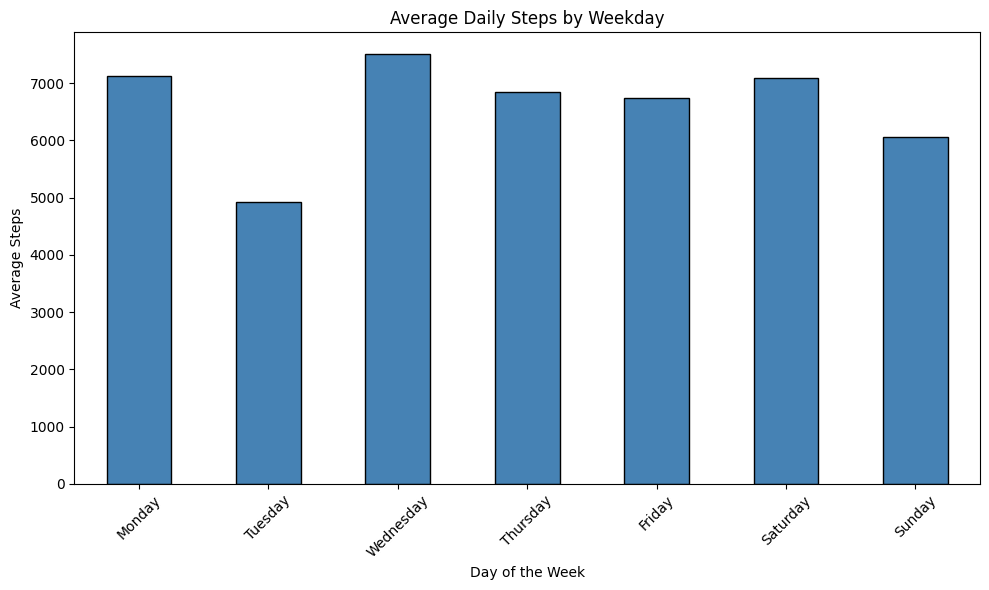

In [13]:
# Group by weekday and calculate average steps
weekday_avg = df.groupby('Weekday')['TotalSteps'].mean()

# Reorder weekdays for proper sequence
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg = weekday_avg.reindex(ordered_days)

# Plot average steps per weekday
plt.figure(figsize=(10,6))
weekday_avg.plot(kind='bar', color='steelblue', edgecolor='black')

# Add title and labels
plt.title("Average Daily Steps by Weekday")
plt.ylabel("Average Steps")
plt.xlabel("Day of the Week")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Step 9: Segment Users by Activity Level

We segmented daily records into three groups based on total step count:

- **Low Activity**: < 5,000 steps  
- **Moderate Activity**: 5,000–9,999 steps  
- **High Activity**: 10,000+ steps

### Results:
- **136 days** were classified as **Low**
- **133 days** were **Moderate**
- **127 days** were **High**

### Interpretation:
User activity is fairly balanced across the three segments, with a slightly higher number of low-activity days. This suggests that many users are inconsistent in their daily movement or fall below recommended activity levels on a regular basis.

### Implications:
Bellabeat could:
- Promote its products (e.g., Leaf or Time) as tools for moving from Low to Moderate activity
- Personalize app messages based on user history (e.g., “You're trending Moderate — ready to hit High this week?”)
- Design challenges or nudges specifically targeted to **low-activity users**, who represent the largest segment


In [14]:
# Define bins for step count
bins = [0, 4999, 9999, 30000]  # last bin covers entire range (max step count ~28k)

# Define labels
labels = ['Low', 'Moderate', 'High']

# Create new column based on step ranges
df['ActivityLevel'] = pd.cut(df['TotalSteps'], bins=bins, labels=labels, right=True)

# Count how many days fall into each activity level
df['ActivityLevel'].value_counts()


,count
ActivityLevel,
Low,136
Moderate,133
High,127


## Step 10: Merge Daily Heart Rate with Activity Data

We loaded the `heartrate_seconds_merged.csv` file and processed it to calculate the average heart rate per user per day.

### What We Did:
- Converted the time-stamped heart rate data to datetime format
- Extracted the date component to allow for daily aggregation
- Calculated the **daily average heart rate** per user
- Merged the resulting table with our cleaned activity dataset

### Why This Matters:
The original heart rate data is recorded every 5 seconds, making it too granular for our use case. Daily aggregation allows us to:
- Combine it with step data
- Analyze physiological effort by activity level
- Identify meaningful trends without unnecessary noise

This merge gives us a clean dataset (`df_merged`) that includes:
- Daily activity metrics
- Activity level segment
- Average heart rate per day

This dataset forms the basis for understanding how physical activity correlates with cardiovascular response — key to product positioning for Bellabeat’s wellness devices.


In [15]:
# Load heart rate data
hr_path = "bellabeat_data/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv"
df_hr = pd.read_csv(hr_path)

# Convert timestamp to datetime
df_hr['Time'] = pd.to_datetime(df_hr['Time'])

# Extract date only (for daily aggregation)
df_hr['ActivityDate'] = df_hr['Time'].dt.date

# Aggregate: average heart rate per user per day
df_hr_daily = df_hr.groupby(['Id', 'ActivityDate'])['Value'].mean().reset_index()

# Rename for clarity
df_hr_daily.rename(columns={'Value': 'AvgHeartRate'}, inplace=True)

# Convert date back to datetime for merge
df_hr_daily['ActivityDate'] = pd.to_datetime(df_hr_daily['ActivityDate'])

# Merge with existing activity dataframe
df_merged = pd.merge(df, df_hr_daily, on=['Id', 'ActivityDate'], how='inner')


In [17]:
df_merged[['TotalSteps', 'ActivityLevel', 'AvgHeartRate']].head()


,TotalSteps,ActivityLevel,AvgHeartRate
0,13603,High,88.563916
1,5477,Moderate,72.068685
2,11144,High,74.398232
3,15313,High,78.295372
4,10805,High,83.474328


## Step 11: Analyze Heart Rate by Activity Level

We compared the average daily heart rate across three activity segments.

### Results:
- **Low Activity**: 73.2 bpm
- **Moderate Activity**: 81.1 bpm
- **High Activity**: 82.2 bpm

### Interpretation:
There is a clear upward trend in average heart rate as activity level increases. This is expected — more movement generally leads to higher cardiovascular effort.

However, the increase from Moderate to High is relatively small (+1.1 bpm), while the jump from Low to Moderate is much larger (+7.9 bpm). This suggests that the biggest heart rate impact happens when users move out of sedentary behavior into moderate activity.

### Implications for Bellabeat:
- Emphasize heart health benefits of **moderate movement** — it delivers significant physiological improvement
- Position Bellabeat products (e.g., Time, Leaf) as tools for tracking and improving **daily cardiovascular response**, not just step counts
- Tailor motivational nudges to help Low-activity users enter Moderate range, where most of the health benefit occurs


In [18]:
# Group by activity level and calculate mean heart rate
df_merged.groupby('ActivityLevel')['AvgHeartRate'].mean()


<ipython-input-18-a22f4a5d5eaf>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_merged.groupby('ActivityLevel')['AvgHeartRate'].mean()


,AvgHeartRate
ActivityLevel,
Low,73.209640
Moderate,81.069720
High,82.181146


## Step 12: Summary of Insights and Marketing Recommendations

### Business Context
Bellabeat wants to expand its presence in the smart wellness device market. To support this, we analyzed Fitbit smart device usage data to identify behavior patterns that could inform Bellabeat’s marketing strategy.

---

### Key Insights

1. **User Engagement Varies Widely**
   - Daily steps ranged from 0 to over 28,000.
   - 25% of days had fewer than 2,000 steps.
   - About **13%** of days had **0 steps**, suggesting device disengagement or syncing issues.

2. **Weekday Activity Trends**
   - **Wednesday** showed the highest average step count.
   - **Tuesday** was consistently the least active day.
   - Users appear to follow a **mid-week peak** activity pattern.

3. **Activity Segments**
   - Days split roughly evenly between **Low (136), Moderate (133), and High (127)** activity.
   - Most users are not consistently meeting common benchmarks like 10,000 steps/day.

4. **Heart Rate Aligns with Activity — But Not Linearly**
   - Jump from Low to Moderate activity sees a large increase in average heart rate (+7.9 bpm).
   - Moderate to High shows only a small additional increase (+1.1 bpm).
   - Moderate activity gives the **biggest cardiovascular gain**, suggesting a sweet spot for behavior-change targeting.

---

### Marketing Strategy Recommendations

1. **Target Low-Activity Users With Habit-Building Nudges**
   - Focus app messaging, notifications, and social features on helping low-activity users build consistent moderate routines.
   - Highlight progress tracking and “streak” features in the Bellabeat app.

2. **Time Campaigns Around Weekly Behavior Cycles**
   - Send motivational messages on **Tuesdays**, when users are least active.
   - Launch mid-week “Move More” challenges to align with peak behavior.

3. **Position Bellabeat as a Heart Health Companion**
   - Emphasize the **cardiovascular response tracking** of Bellabeat’s Time or Leaf products.
   - Show users how even moderate movement improves heart rate — not just step counts.

4. **Use Segments for Personalization**
   - Classify users by activity level and serve personalized messages:
     - Low: encouragement, reminders
     - Moderate: motivation to level up
     - High: achievement tracking, social badges

---

### Next Steps
With these patterns confirmed, Bellabeat can:
- Apply these findings to user cohorts in its own data
- Build campaigns and app features aligned to real behavior
- Measure changes over time to test if engagement improves

